# Import & Install

In [1]:
# !pip install folium
# !pip install requests
# !pip install networkx 
# !pip install pydot
# !pip install matplotlib seaborn
import pandas as pd
import numpy as np
import folium
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Load DataFrame 🦖🦕

In [2]:
jurassic = pd.read_csv('jurassic_dino.csv')

# Data Cleaning

In [3]:
jurassic = jurassic.drop(columns = ['link','named_by','taxonomy'])

jurassic['geological_age'] = jurassic['period'].apply(lambda x: " ".join(x.split(" ")[0:2]))
jurassic['length'] = jurassic['length'].apply(lambda x: float(x.replace("m", "")) if isinstance(x, str) else x)
jurassic = jurassic.drop(columns = 'period')
age_to_number = {'Late Triassic': 0,'Early Jurassic': 1,'Mid Jurassic': 2,'Late Jurassic': 3,'Early Cretaceous': 4,'Mid Cretaceous': 5,'Late Cretaceous': 6}
jurassic['age'] = jurassic['geological_age'].map(age_to_number)

jurassic.loc[jurassic['lived_in'] == 'USA', 'lived_in'] = 'United States of America'

## Geological Distribution of 🦖🦕 over Time

In [4]:
def draw_map(dataf, m, bins):
    country_data = requests.get(
        "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/world_countries.json"
    ).json()
    folium.Choropleth(
        geo_data=country_data,
        name="choropleth",
        data=dataf,
        columns=["lived_in", "species"],
        key_on="feature.properties.name",
        fill_color="YlGn",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name="type occurence",
        nan_fill_color='white',
        threshold_scale=bins
    ).add_to(m)
    folium.LayerControl().add_to(m)
    display(m)

### Overview

In [5]:
# mall = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_all = jurassic.fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# bins = list(np.arange(0, jurassic_all['species'].max() + 1))
# draw_map(jurassic_all, mall, bins)

### Geological Period Late Triassic - Late Cretaceous

In [6]:
# consistent_bins = list(np.arange(0, 43))

In [7]:
# m0 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_0 = jurassic[jurassic['age'] == 0].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_0, m0, consistent_bins)

In [8]:
# m1 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_1 = jurassic[jurassic['age'] == 1].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_1, m1, consistent_bins)

In [9]:
# m2 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_2 = jurassic[jurassic['age'] == 2].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_2, m2, consistent_bins)

In [10]:
# m3 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_3 = jurassic[jurassic['age'] == 3].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_3, m3, consistent_bins)

In [11]:
# m4 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_4 = jurassic[jurassic['age'] == 4].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_4, m4, consistent_bins)

In [12]:
# m6 = folium.Map(location=[45.0, 0], zoom_start=2.2)
# jurassic_6 = jurassic[jurassic['age'] == 6].fillna(value=999, inplace=False).groupby('lived_in').count().reset_index()[['lived_in', 'species']]
# draw_map(jurassic_6, m6, consistent_bins)

# More Data Cleaning

In [13]:
jurassic.dropna(inplace=True)

## 🦖🦕 Diet vs. 🦖🦕 Length

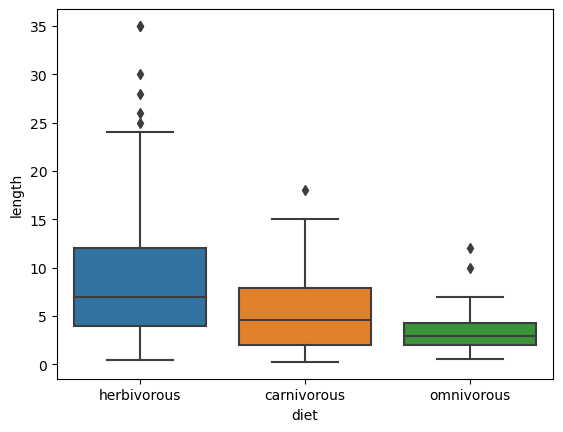

In [14]:
filtered_jurassic = jurassic[jurassic['diet'].isin(['omnivorous', 'carnivorous','herbivorous' ])].copy()
sns.boxplot(x='diet', y='length', data=filtered_jurassic);

## Geological Period vs.  🦖🦕 Diet Proportion 

In [15]:
ordered_age = ['Late Triassic','Early Jurassic', 'Mid Jurassic', 'Late Jurassic', 'Early Cretaceous', 'Late Cretaceous']
filtered_jurassic['geological_age'] = pd.Categorical(filtered_jurassic['geological_age'], categories=ordered_age, ordered=True)
ordered_diet = ['omnivorous','carnivorous', 'herbivorous']
filtered_jurassic['diet'] = pd.Categorical(filtered_jurassic['diet'], categories=ordered_diet, ordered=True)
filtered_jurassic = filtered_jurassic.sort_values(by='geological_age')

In [16]:
count_jurassic = filtered_jurassic.groupby(['geological_age', 'diet']).size().reset_index(name='count')
total_counts = count_jurassic.groupby('geological_age')['count'].transform('sum')
count_jurassic['proportion'] = count_jurassic['count'] / total_counts

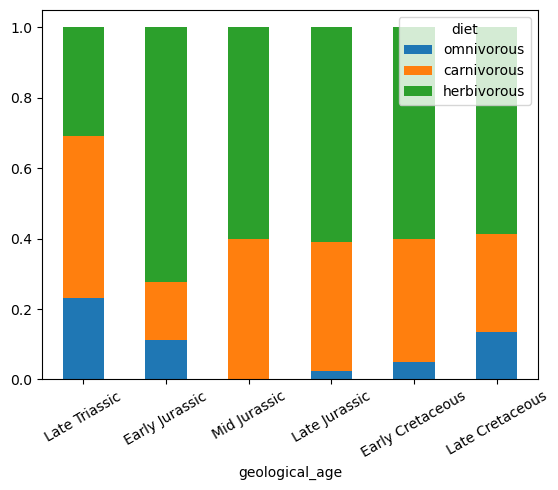

In [28]:
pivot_jurassic = count_jurassic.pivot(index='geological_age', columns='diet', values='proportion')
plot = pivot_jurassic.plot(kind='bar', stacked=True);
plot.set_xticklabels(labels = ['Late Triassic','Early Jurassic', 'Mid Jurassic', 'Late Jurassic', 'Early Cretaceous', 'Late Cretaceous'],rotation=30);

## 🦖🦕 Type vs. 🦖🦕 Length

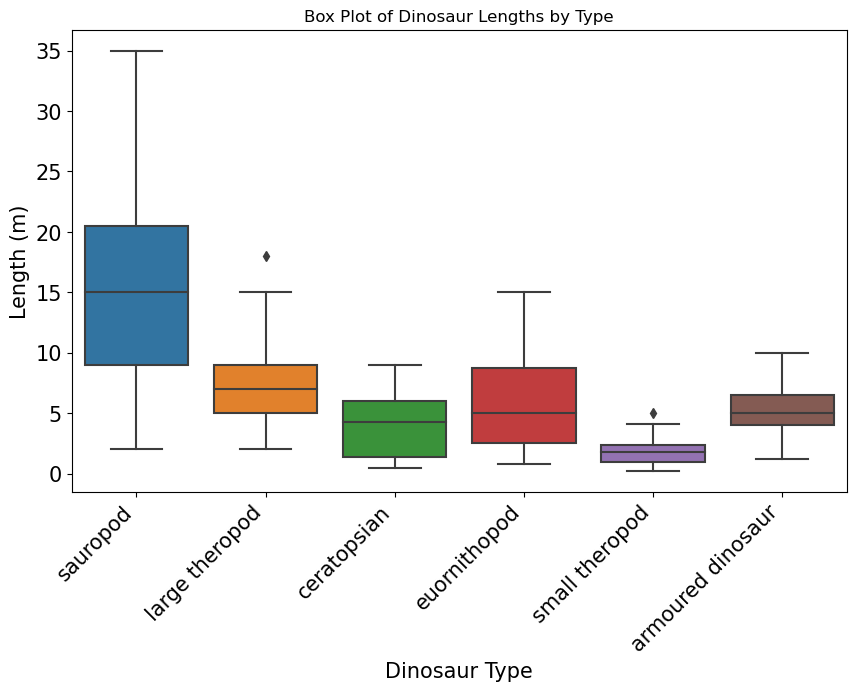

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='length', data=jurassic)
plt.title('Box Plot of Dinosaur Lengths by Type')
plt.xlabel('Dinosaur Type', fontsize = 15)
plt.ylabel('Length (m)', fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

## Geological Period vs.  🦖🦕 Type

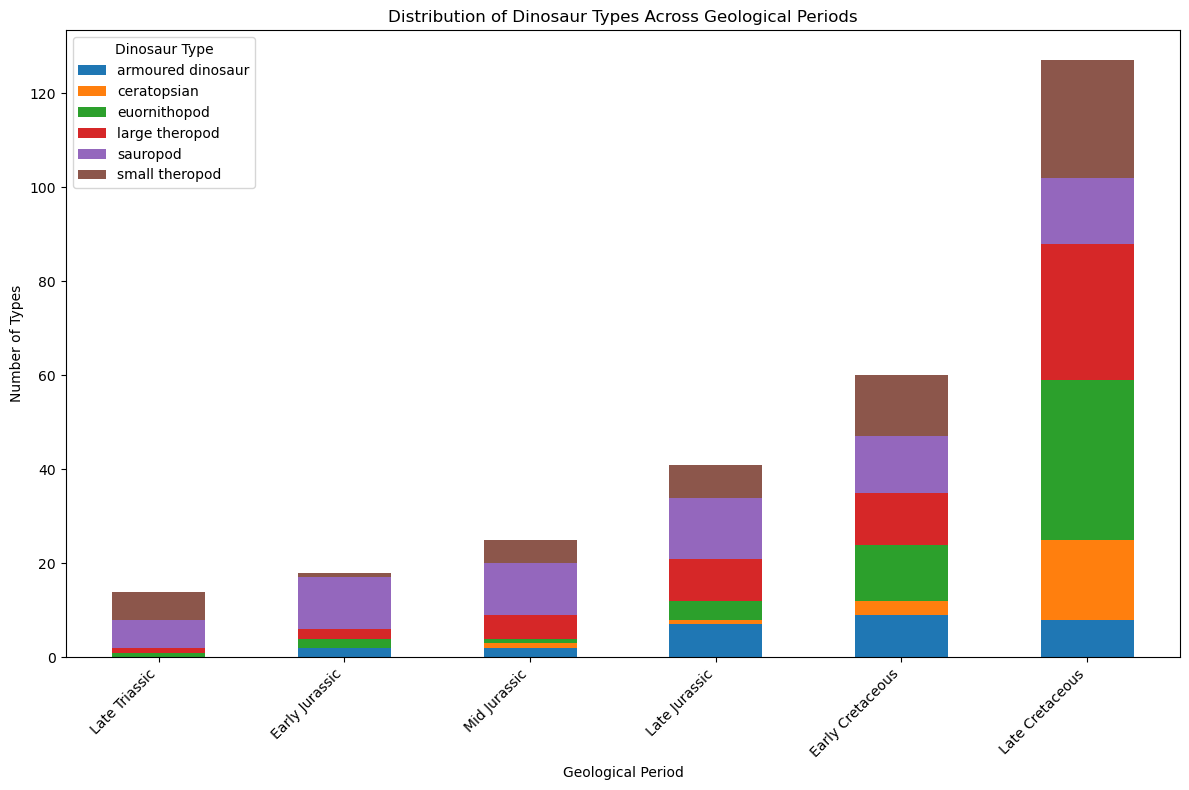

In [19]:
grouped_data = jurassic.groupby(['geological_age', 'type']).size().unstack(fill_value=0).reset_index()
ordered_age = ['Late Triassic','Early Jurassic', 'Mid Jurassic', 'Late Jurassic', 'Early Cretaceous', 'Late Cretaceous']
grouped_data['geological_age'] = pd.Categorical(grouped_data['geological_age'], categories=ordered_age, ordered=True)
grouped_data = grouped_data.sort_values(by='geological_age').set_index('geological_age')

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Dinosaur Types Across Geological Periods')
plt.xlabel('Geological Period')
plt.ylabel('Number of Types')
plt.xticks(rotation=45, ha='right') 


plt.legend(title='Dinosaur Type')
plt.tight_layout() 
plt.show()